In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

In [4]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [5]:
from imblearn.over_sampling import SMOTE # Synthetic Minority Oversampling Technique
from imblearn.datasets import make_imbalance

In [6]:
X_imbalanced, y_imbalanced = make_imbalance(X, y, 
                                            sampling_strategy={
                                                0: 10,
                                                1: 20,
                                                2: 30
                                            })

In [7]:
np.unique(y_imbalanced, return_counts=True)

(array([0, 1, 2]), array([10, 20, 30], dtype=int64))

In [8]:
smote = SMOTE() # Synthetic Minority Oversampling Technique

In [9]:
X_balanced, y_balanced = smote.fit_resample(X_imbalanced, y_imbalanced)

In [10]:
np.unique(y_balanced, return_counts=True)

(array([0, 1, 2]), array([30, 30, 30], dtype=int64))

# Classification

In [11]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv('../dataset/Social_Network_Ads.csv')

In [13]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
data.drop(['User ID'], axis=1, inplace=True)

In [15]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [16]:
data['EstimatedSalary'] = data['EstimatedSalary'] / 1000

In [17]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19.0,0
1,Male,35,20.0,0
2,Female,26,43.0,0
3,Female,27,57.0,0
4,Male,19,76.0,0


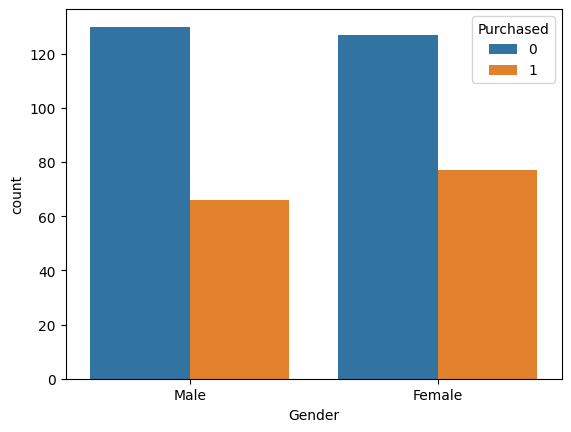

In [18]:
sns.countplot(x='Gender', data=data, hue='Purchased')
plt.show()

In [19]:
data.drop(['Gender'], axis=1, inplace=True)

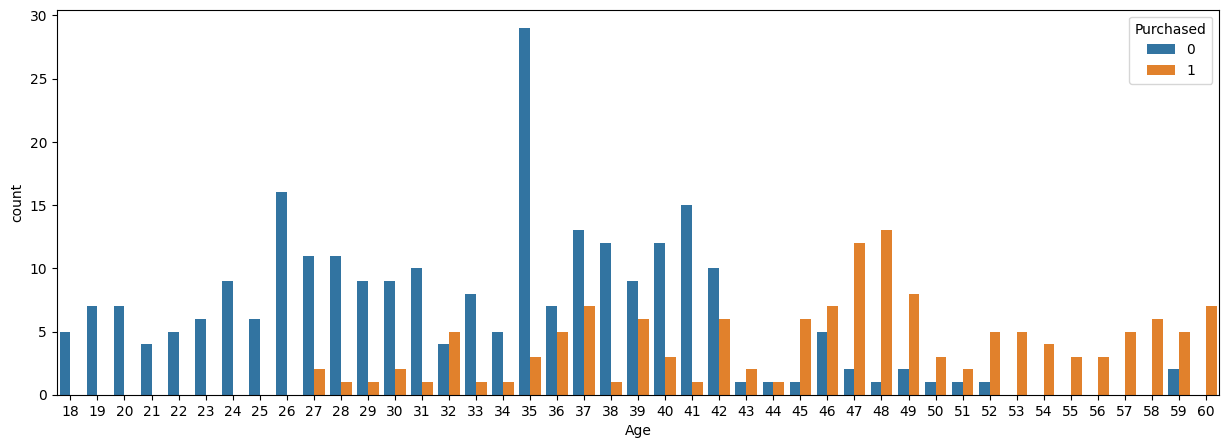

In [20]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Age', data=data, hue='Purchased')
plt.show()

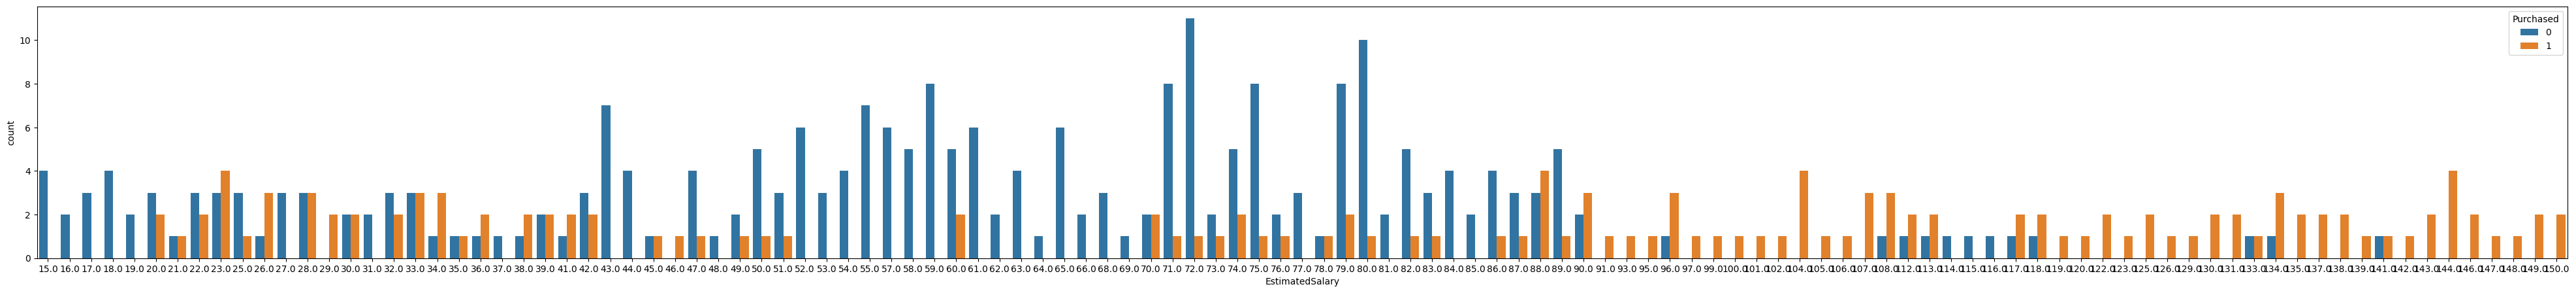

In [21]:
plt.figure(figsize=(50, 5))
sns.countplot(x='EstimatedSalary', data=data, hue='Purchased')
plt.show()

In [22]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19.0,0
1,35,20.0,0
2,26,43.0,0
3,27,57.0,0
4,19,76.0,0


In [23]:
np.unique(data['Purchased'], return_counts=True)

(array([0, 1], dtype=int64), array([257, 143], dtype=int64))

In [24]:
y = data['Purchased']
X = data[['Age', 'EstimatedSalary']]

In [25]:
# smote = SMOTE(random_state=666)
# X, y = smote.fit_resample(X, y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [27]:
rand_forest = RandomForestClassifier(n_jobs=-1, random_state=666)

In [28]:
rand_forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=666)

In [29]:
y_pred = rand_forest.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [32]:
from sklearn.svm import SVC
# SVM: Support Vector Machine
# SVC: Support Vector Classifier
# SVR: Support Vector Regressor

In [33]:
support_vec = SVC()

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
support_vec.fit(X_train, y_train)

SVC()

In [36]:
y_pred = support_vec.predict(X_test)

In [37]:
accuracy_score(y_test, y_pred)

0.9166666666666666

In [38]:
import keras

In [39]:
import tensorflow as tf

In [40]:
tf.__version__

'2.12.0'

In [41]:
keras.__version__

'2.12.0'

In [ ]:
!pip install tensorflow keras